


#  Task 1 Introduction : Transportation,  Cycle Infrastructure by Length

**Greater Dublin Area Cycle Infrastructure in Ireland **

**To IRELAND used file: dublin_bikelife_210817.csv; Dataframe dfIE**

https://data.gov.ie/dataset/greater-dublin-area-cycle-infrastructure-nta
This dataset contains cycle infrastructure in the Greater Dublin Area (GDA). Data stems from work undertaken on behalf of the NTA to:
re-categorise the 2013 street survey with infrastructure types: segregated cycle track, bus lane with cycle lane, etc.
include links inputted by the NTA in the course of developing and maintaining the journey planner
include NTA funded completed cycle infrastructure 2013-2021

Licensed under: Creative Commons Attribution 4.0

data.gov.ie
--------------------------------

------------------------------

**Cycle Facility Network in NZ**

**To NEWZELAND used file: Cycle_Facility_Network.CSV; Dataframe dfNZ  **

https://catalogue.data.govt.nz/dataset/cycle-facility-network3/resource/b1219489-860d-4017-8328-abf1db6e91f1
The Auckland Cycle Network (ACN) provides a plan for the development of and investment in a comprehensive 
cycle network for the region.

Licensed under: CC-BY 4.0 International licence details

data.govt.nz
------------

---------------------------

Backup in GITHUB LINK: https://github.com/Johanna23cct/-Users-of-Cars-Involved-in-Fatal-and-Injury-Collisions.git


#  Task 2 Setup and imports libraries

In [1]:
# Importing some libraries:
import pandas as pd
import statistics as stats
import numpy as np
import csv

# import some libraries for Visualising the price variable:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')



# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor

# Import Some libraries for Sentimet Analysis 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm



In [2]:
pd.__version__

'2.0.3'

In [3]:
!python --version

Python 3.11.5


In [4]:
# pd.show_versions()

#  Task 3 importing data and EDA
Read data from csv.
Shape. 
Drop unnecessary columns. 
add sentiment.
Calculation of Polarity summary statistics Descriptive

In [5]:
imgIE = mpimg.imread('IE.png')
imgNZ = mpimg.imread('NZ.png')

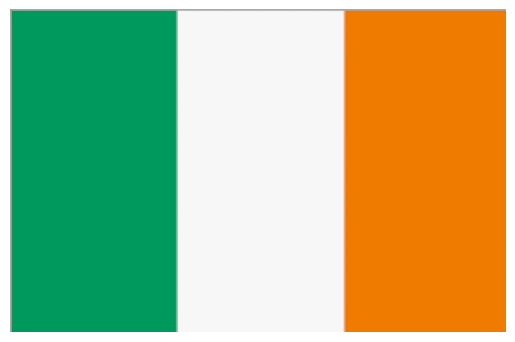

In [6]:
plt.imshow(imgIE)
plt.axis('off')  # Dataframe dfIE
plt.show()

In [7]:
dfIE = pd.read_csv('dublin_bikelife_210817.csv')
dfIE.head()


,Route_No,Comments_1,Shape_Leng,cdo,twoway,sruface_ch,bollardpro,temporary,mandatory,width,...,trafficfre,signedrout,oneside,twoway_sin,oneplus,review,difference,gid,MERGE_SRC,Shape_Le_1
0,1-1,NaN,172.522128,SegregatedCycleLane,0,0,1,0,1,1.2,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,NaN,261.891707,SegregatedCycleLane,1,0,1,0,1,3.7,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,NaN,108.076912,CycleLane,0,0,0,0,1,1.9,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,NaN,78.613318,SegregatedCycleLane,0,0,1,0,1,1.9,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,NaN,141.048015,BusLane,0,0,0,0,0,3.7,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,141.048015


In [8]:
# To Drop one duplicate row TLIST(A1)	Year
to_drop = ['Comments_1', 'Shape_Leng', 'twoway', 'sruface_ch', 'bollardpro', 'temporary', 'mandatory', 'width', 'trafficfre', 'signedrout', 'oneside', 'twoway_sin', 'oneplus', 'review', 'difference', 'gid', 'surface_ch', 'buslane', 'OBJECTID', 'datasource', 'classifica', 'classifi_1', 'cyclelane', 'shareduse', 'segregated' ]
dfIE.drop(columns=to_drop, inplace=True)
dfIE.head()

,Route_No,cdo,MERGE_SRC,Shape_Le_1
0,1-1,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,CycleLane,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,BusLane,Dublin_BikeLife_210813_Jacobs,141.048015


In [9]:
dfIE.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5636 entries, 0 to 5635
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route_No    280 non-null    object 
 1   cdo         288 non-null    object 
 2   MERGE_SRC   5636 non-null   object 
 3   Shape_Le_1  5636 non-null   float64
dtypes: float64(1), object(3)
memory usage: 1.0 MB


In [10]:
# Define the columns  to read from the CSV file IRALAND
cols = ['cdo', 'Shape_Le_1']

# Read the CSV file into a DataFrame
small_dfIE = pd.read_csv('dublin_bikelife_210817.csv', usecols=cols)

# Print the summary information of the DataFrame
small_dfIE.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5636 entries, 0 to 5635
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cdo         288 non-null    object 
 1   Shape_Le_1  5636 non-null   float64
dtypes: float64(1), object(1)
memory usage: 231.0 KB


In [11]:
dfIE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5636 entries, 0 to 5635
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route_No    280 non-null    object 
 1   cdo         288 non-null    object 
 2   MERGE_SRC   5636 non-null   object 
 3   Shape_Le_1  5636 non-null   float64
dtypes: float64(1), object(3)
memory usage: 176.3+ KB


In [12]:
dfIE.rename(columns={'Shape_Le_1': 'Shape__Length IE'}, inplace=True)
dfIE.rename(columns={'cdo': 'TYPEOFFACILITY'}, inplace=True)
dfIE.head()

,Route_No,TYPEOFFACILITY,MERGE_SRC,Shape__Length IE
0,1-1,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,CycleLane,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,BusLane,Dublin_BikeLife_210813_Jacobs,141.048015


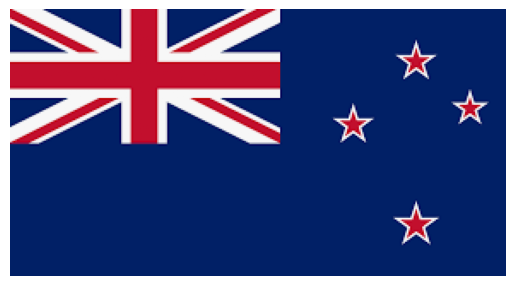

In [13]:
plt.imshow(imgNZ)
plt.axis('off')  #Dataframe dfNZ  
plt.show()

In [14]:
dfNZ = pd.read_csv('Cycle_Facility_Network.CSV')
dfNZ.head()

,OBJECTID,IDENTIFIER,ROUTEFUNCTION,ROADNAME,STATUS,CONSTRUCTIONYEAR,LOCALBOARD,VEHICLESPEEDLIMIT,TRAFFICAADT,TYPEOFFACILITY,JOURNEYCORRIDOR,Shape__Length
0,1,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,5.746521
1,2,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,963.546209
2,3,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,415.740382
3,4,3.0,NaN,Rosedale Park North,Existing,NaN,Upper Harbour,NaN,NaN,Local area traffic management,NaN,110.928884
4,5,3.0,NaN,Rosedale Park North,Existing,NaN,Upper Harbour,NaN,NaN,Off-road shared path,NaN,685.221694


In [15]:
dfNZ.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           1542 non-null   int64  
 1   IDENTIFIER         910 non-null    float64
 2   ROUTEFUNCTION      0 non-null      float64
 3   ROADNAME           1224 non-null   object 
 4   STATUS             1542 non-null   object 
 5   CONSTRUCTIONYEAR   331 non-null    float64
 6   LOCALBOARD         1323 non-null   object 
 7   VEHICLESPEEDLIMIT  0 non-null      float64
 8   TRAFFICAADT        0 non-null      float64
 9   TYPEOFFACILITY     1542 non-null   object 
 10  JOURNEYCORRIDOR    0 non-null      float64
 11  Shape__Length      1542 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 514.4 KB


In [16]:
# Define the columns  to read from the CSV file NZ
cols = ['TYPEOFFACILITY', 'Shape__Length']

# Read the CSV file into a DataFrame
small_dfNZ = pd.read_csv('Cycle_Facility_Network.csv', usecols=cols)

# Print the summary information of the DataFrame
small_dfNZ.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TYPEOFFACILITY  1542 non-null   object 
 1   Shape__Length   1542 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.4 KB


In [17]:
dfNZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           1542 non-null   int64  
 1   IDENTIFIER         910 non-null    float64
 2   ROUTEFUNCTION      0 non-null      float64
 3   ROADNAME           1224 non-null   object 
 4   STATUS             1542 non-null   object 
 5   CONSTRUCTIONYEAR   331 non-null    float64
 6   LOCALBOARD         1323 non-null   object 
 7   VEHICLESPEEDLIMIT  0 non-null      float64
 8   TRAFFICAADT        0 non-null      float64
 9   TYPEOFFACILITY     1542 non-null   object 
 10  JOURNEYCORRIDOR    0 non-null      float64
 11  Shape__Length      1542 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 144.7+ KB


In [18]:
# To Drop one duplicate row TLIST(A1)	Year
to_drop = ['OBJECTID', 'IDENTIFIER', 'ROUTEFUNCTION', 'CONSTRUCTIONYEAR', 'VEHICLESPEEDLIMIT', 'TRAFFICAADT', 'JOURNEYCORRIDOR' ]
dfNZ.drop(columns=to_drop, inplace=True)
dfNZ.head()

,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length
0,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [19]:
dfNZ.rename(columns={'Shape__Length': 'Shape__Length NZ'}, inplace=True)
dfNZ.head()

,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length NZ
0,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [20]:
# dfNZ.tail()

In [21]:
print(dfIE['Shape__Length IE']) #IE

0       172.522128
1       261.891707
2       108.076912
3        78.613318
4       141.048015
           ...    
5631    736.147520
5632    648.992720
5633    456.366007
5634    112.858520
5635    751.762409
Name: Shape__Length IE, Length: 5636, dtype: float64


In [22]:
#dfI['TYPEOFFACILITY' ].value_counts().sort_index().plot(kind='bar', title='TYPEOFFACILITY IN IRELAND',
#    figsize=(10, 5))
# show [<Axes: title={'center': 'TYPEOFFACILITY IN IRELAND'}, xlabel='TYPEOFFACILITY'>]
#next is better

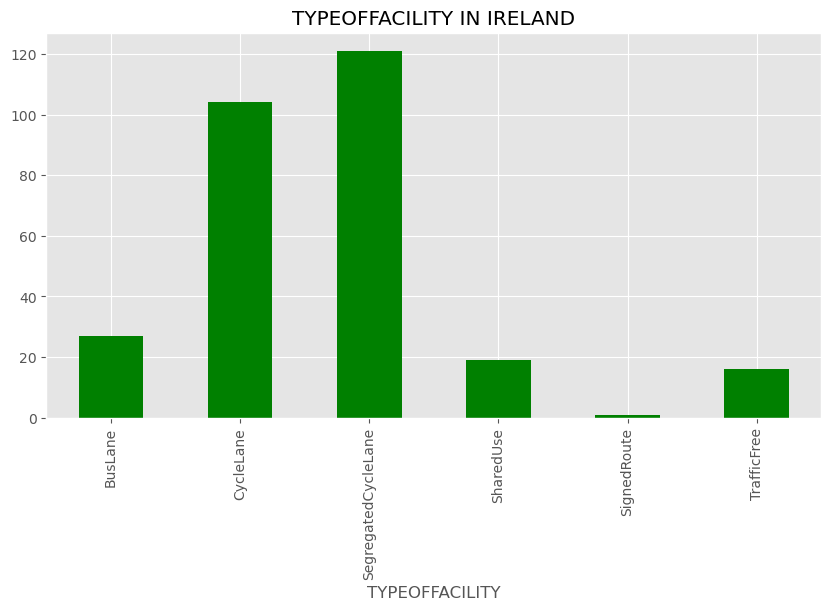

In [23]:
ax = dfIE['TYPEOFFACILITY'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='TYPEOFFACILITY IN IRELAND',
          figsize=(10, 5),
          color='green')  

ax.set_xlabel('TYPEOFFACILITY')
plt.show()

In [24]:
print(dfNZ['Shape__Length NZ']) #NZ

0          5.746521
1        963.546209
2        415.740382
3        110.928884
4        685.221694
           ...     
1537     280.329822
1538    1314.740577
1539      82.583260
1540     153.894935
1541      56.655550
Name: Shape__Length NZ, Length: 1542, dtype: float64


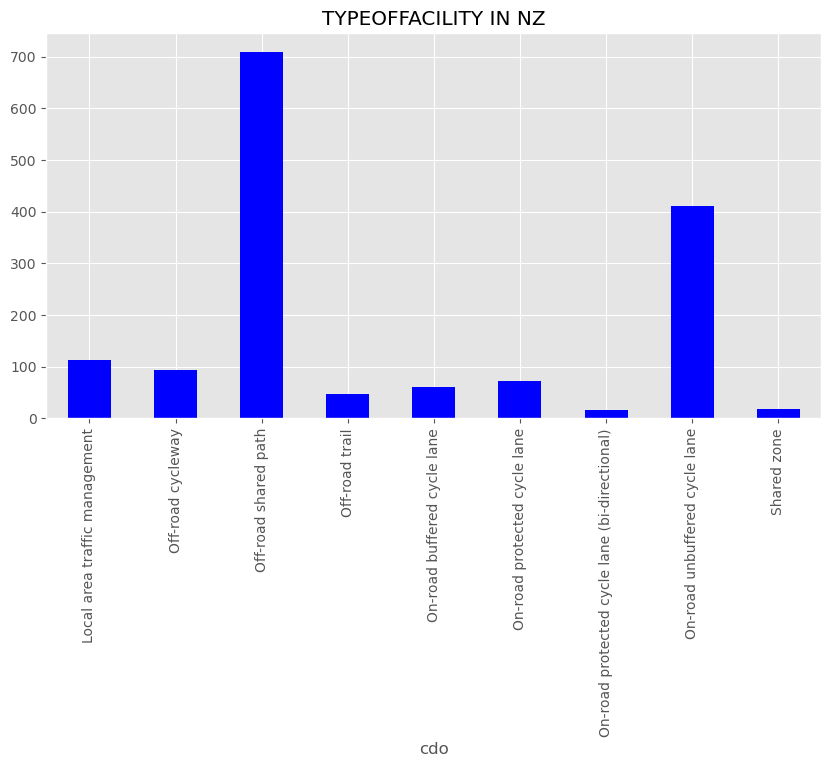

In [25]:
ax =  dfNZ['TYPEOFFACILITY' ].value_counts().sort_index() \
    .plot(kind='bar', 
          title='TYPEOFFACILITY IN NZ',
          figsize=(10, 5),
         color='blue') 
ax.set_xlabel('cdo')
plt.show()


**Analysis measures**


In [26]:
dfIE.describe()  # Ireland

,Shape__Length IE
count,5636.000000
mean,117.847005
std,184.526130
min,0.075140
25%,33.823079
50%,66.855330
75%,132.033852
max,5677.287194


In [27]:
dfIE.shape  #Shape__Length IE Count is a same than Shape, there aren't lost data

(5636, 4)

In [28]:
dfNZ.describe()  #NZ

,Shape__Length NZ
count,1542.000000
mean,443.905213
std,556.762057
min,0.011265
25%,107.427329
50%,253.905857
75%,570.517557
max,4884.670418


In [29]:
dfNZ.shape  #Shape__Length NZ Count is a same than Shape, there aren't lost data

(1542, 5)

In [30]:
# Finding specific statistics such as the mean:
mean_adm = dfIE['Shape__Length IE'].mean()
print(round(mean_adm, 2))

117.85


In [31]:
# Finding specific statistics such as the mean:
mean_adm = dfNZ['Shape__Length NZ'].mean()
print(round(mean_adm, 2))

443.91


In [32]:
# And the median:
median = dfIE['Shape__Length IE'].median()
print(median)

66.85532970220001


In [33]:
# And the median:
median = dfNZ['Shape__Length NZ'].median()
print(median)

253.9058574993035


[Text(0.5, 0, 'Shape'),
 Text(0, 0.5, 'Dublin_BikeLife'),
 Text(0.5, 1.0, 'Shape__Length Ireland Histogram')]

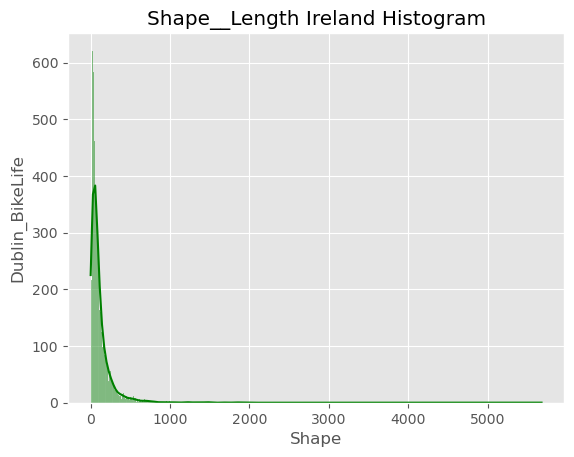

In [34]:
# Producing a histogram:
ax = sns.histplot(dfIE['Shape__Length IE'], kde=True, color ='green')
ax.set(xlabel='Shape',
       ylabel='Dublin_BikeLife',
       title ='Shape__Length Ireland Histogram')

[Text(0.5, 0, 'Shape'),
 Text(0, 0.5, 'NZ_BikeLife'),
 Text(0.5, 1.0, 'Length NZ')]

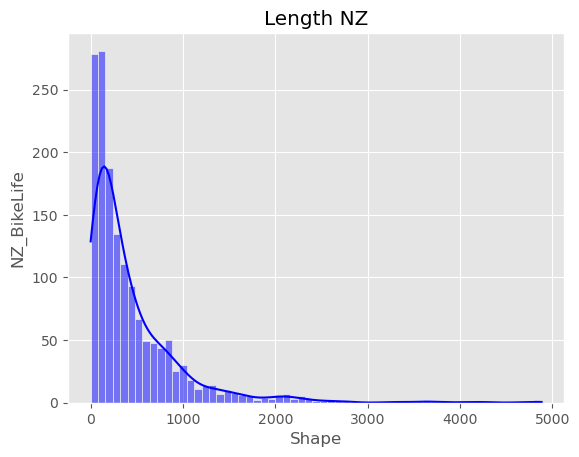

In [35]:
ax = sns.histplot(dfNZ['Shape__Length NZ'], kde=True, color ='blue')
ax.set(xlabel='Shape',
       ylabel='NZ_BikeLife',
       title ='Length NZ')

Text(0.5, 1.0, 'Boxplot of Shape__Length IE')

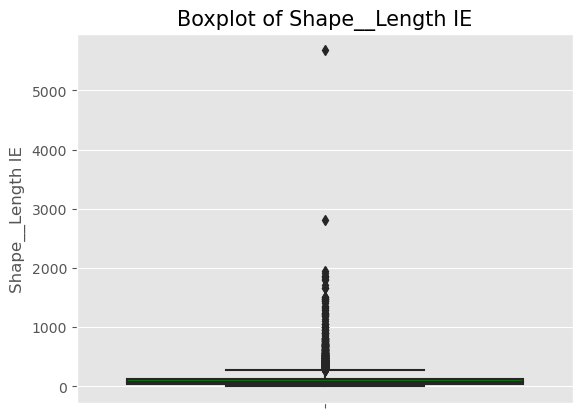

In [36]:
sns.boxplot(y ='Shape__Length IE',
             data=dfIE,
             color = 'green')
plt.title('Boxplot of Shape__Length IE',
           fontsize=15)


Text(0.5, 1.0, 'Boxplot of Shape__Length NZ')

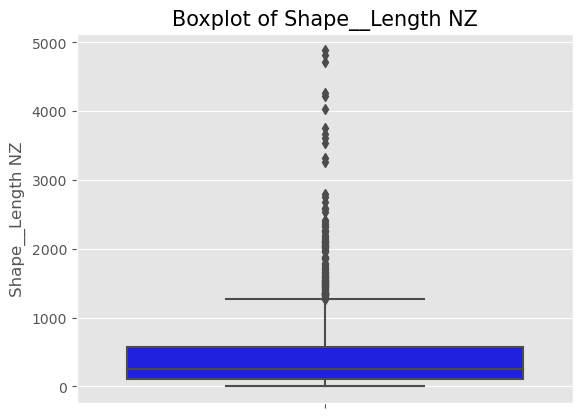

In [37]:
sns.boxplot(y ='Shape__Length NZ',
             data=dfNZ,
           color ='blue')
plt.title('Boxplot of Shape__Length NZ',
           fontsize=15)


# Sentiment with the analytis meassure
NLTK's SentimentIntensisyAnalyzer 
to get the negative, neutral and positive scores 
# data1 = Ireland       data2 = NZ

In [38]:
dfIE.describe().loc['min':'max'] #Ireland

,Shape__Length IE
min,0.075140
25%,33.823079
50%,66.855330
75%,132.033852
max,5677.287194


In [39]:
dfNZ.describe().loc['min':'max'] #NZ

,Shape__Length NZ
min,0.011265
25%,107.427329
50%,253.905857
75%,570.517557
max,4884.670418


In [40]:
dfIE[['Shape__Length IE']]

,Shape__Length IE
0,172.522128
1,261.891707
2,108.076912
3,78.613318
4,141.048015
...,...
5631,736.147520
5632,648.992720
5633,456.366007
5634,112.858520


In [41]:
stacked = dfIE['Shape__Length IE'].stack()

AttributeError: 'Series' object has no attribute 'stack'

In [42]:
stacked

NameError: name 'stacked' is not defined

In [57]:
dfstat=dfIE['Shape__Length IE']

In [58]:
dfIE = fdIE.assign(stat=dfstat)

NameError: name 'fdIE' is not defined

In [ ]:
dfIE[['Shape__Length IE']]

In [ ]:
dfIE[['Shape__Length IE']]

In [66]:
#1686	U+1F1E8 U+1F1EE irland
#1818	U+1F1F3 U+1F1FF nz
#1688	U+1F1E8 U+1F1F1	chili
print("Hello! \U0001F1F3\U0001F1FF) 
print("Hello! \U0001F60A")
print("Hello! \U0001F60A\U0001F44B")

SyntaxError: unterminated string literal (detected at line 4) (4175285177.py, line 4)

In [ ]:
# Calculate statistics for the column 'Shape__Length IE'
stats = dfIE['Shape__Length IE'].describe()

# Extract specific statistics
mean = stats['mean']
median = stats['50%']  # 50th percentile is the median

# Insert the statistics into the DataFrame
dfIE['mean'] = mean
dfIE['median'] = median

# Print the updated DataFrame
print(dfIE.head())


In [44]:
dfIE[['Shape__Length IE', 'mean', 'median']]

,Shape__Length IE,mean,median
0,172.522128,117.847005,66.85533
1,261.891707,117.847005,66.85533
2,108.076912,117.847005,66.85533
3,78.613318,117.847005,66.85533
4,141.048015,117.847005,66.85533
...,...,...,...
5631,736.147520,117.847005,66.85533
5632,648.992720,117.847005,66.85533
5633,456.366007,117.847005,66.85533
5634,112.858520,117.847005,66.85533


In [42]:
# Calculate statistics for the column 'Shape__Length IE'
stats = dfIE['Shape__Length IE'].describe()

# Extract specific statistics
mean = stats['mean']
median = stats['50%']  # 50th percentile is the median

# Insert the statistics into the DataFrame
dfIE.insert(loc=len(dfNZ['Shape__Length NZ']), column='mean', value=mean)
dfIE.insert(loc=len(dfNZ['Shape__Length NZ']), column='median', value=median)

# Print the updated DataFrame
dfIE.head()

IndexError: index 1542 is out of bounds for axis 0 with size 4

In [45]:
# Sample DataFrame
data = {'dfIE': [0.011265, 107.427329, 253.905857, 570.517557, 4884.670418]}
dfIEst = pd.DataFrame(data)

# Calculate statistics using describe()
stats = dfIEst.describe().loc[['mean', '50%']]  # Extract mean and median (50th percentile)

# Rename the index to 'averages'
stats.index = ['mean', 'median']  # You can rename 'median' if needed

# Concatenate the original DataFrame and the statistics DataFrame along the rows
dfIEst = pd.concat([dfIEst, stats])

# Print the updated DataFrame
print(dfIEst)

               dfIE
0          0.011265
1        107.427329
2        253.905857
3        570.517557
4       4884.670418
mean    1163.306485
median   253.905857


In [49]:
# Assuming 'data' is a pandas DataFrame containing your numerical data
data = pd.DataFrame({
    'Shape__Length_NZ': [0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
})

# Define sentiment categories based on quartiles
data['Sentiment'] = pd.cut(data['Shape__Length_NZ'], bins=[-float('inf'), 33.823079, 66.855330, 132.033852, float('inf')], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

# Now 'Sentiment' column contains sentiment labels for each numerical value

# Perform sentiment analysis (this step depends on your specific requirements)

# For demonstration, let's just print the sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()
print(sentiment_distribution)

Sentiment
Very Negative    2
Negative         1
Neutral          1
Positive         1
Name: count, dtype: int64


In [50]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:1]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

KeyError: 'Polarity_Rating'

In [ ]:
# Assuming 'data' is a pandas DataFrame containing your numerical data
data = pd.DataFrame({
    'Shape__Length_NZ': [0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
})

# Define sentiment categories based on quartiles
data['Sentiment'] = pd.cut(data['Shape__Length_NZ'], bins=[-float('inf'), 33.823079, 66.855330, 132.033852, float('inf')], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

# Now 'Sentiment' column contains sentiment labels for each numerical value

# Perform sentiment analysis (this step depends on your specific requirements)

# For demonstration, let's just print the sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()
print(sentiment_distribution)

In [ ]:
def analyze_Length_sentiment(Shape__Length IE):
       text = text.lower() 
        return text
df['Length_Sentiment'] = df['Shape__Length IE'].apply(analyze_Length_sentiment)
df.head()    
     
    

In [ ]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:1]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

In [ ]:
# Mean
numeric_data = df["Year"]
if numeric_data.dtype == 'int64' or numeric_data.dtype == 'float64':
    mean = numeric_data.mean()
    mean_rounded = round(mean, 2)
    print('Mean:', mean_rounded)
else:
    print("The selected column does not contain numeric data")

    
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column


df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()    
 
    
    
    median = home["National"].median()
print('Median:', median)

In [44]:
# Sample data
dfNZ = {
    'Shape__Length_NZ': [5636.000000, 117.847005, 184.526130, 0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
}

# Create DataFrame from the data dictionary
dfNZ = pd.DataFrame(dfNZ)

# Calculate the mean of the numerical data
mean_value = dfNZ['Shape__Length_NZ'].mean()

# Define thresholds for sentiment categories

positive_threshold = mean_value + dfNZ['Shape__Length_NZ'].std()  # Positive above mean + std
negative_threshold = mean_value - dfNZ['Shape__Length_NZ'].std()  # Negative below mean - std


# Create a new column with categorical data based on thresholds
dfNZ['Sentiment'] = pd.cut(dfNZ['Shape__Length_NZ'], 
                          bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                          labels=['Negative', 'Neutral', 'Positive'])

# Print the DataFrame with the new column
print(dfNZ)

print(round(mean_adm, 2))
print(median)

   Shape__Length_NZ Sentiment
0       5636.000000  Positive
1        117.847005   Neutral
2        184.526130   Neutral
3          0.075140   Neutral
4         33.823079   Neutral
5         66.855330   Neutral
6        132.033852   Neutral
7       5677.287194  Positive
117.85
66.85532970220001


In [37]:
# Sample data
dfNZ = {
    'Shape__Length_NZ': [5636.000000, 117.847005, 184.526130, 0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
}

# Create DataFrame from the data dictionary
df = pd.DataFrame(dfNZ)

# Rename the index labels if needed
# df.index = ['Row1', 'Row2', 'Row3', 'Row4', 'Row5', 'Row6', 'Row7', 'Row8']

# Calculate the mean of the numerical data
mean_value = df['Shape__Length_NZ'].mean()
std_value = df['Shape__Length_NZ'].std()
min_value = df['Shape__Length_NZ'].min()

# Define thresholds for sentiment categories
positive_threshold = mean_value + df['Shape__Length_NZ'].std()  # Positive above mean + std
negative_threshold = mean_value - df['Shape__Length_NZ'].min()  # Negative below mean - std

# Create a new column with categorical data based on thresholds
df['Sentiment'] = pd.cut(df['Shape__Length_NZ'], 
                          bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                          labels=['Negative', 'Neutral', 'Positive'])

# Print the DataFrame with the new column
print(df)

   Shape__Length_NZ Sentiment
0       5636.000000  Positive
1        117.847005  Negative
2        184.526130  Negative
3          0.075140  Negative
4         33.823079  Negative
5         66.855330  Negative
6        132.033852  Negative
7       5677.287194  Positive


In [ ]:
dfNZ = {
    'Shape__Length_NZ': [5636.000000, 117.847005, 184.526130, 0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
}

# Create DataFrame from the data dictionary
df = pd.DataFrame(dfNZ)

# Rename the index labels if needed
# df.index = ['Row1', 'Row2', 'Row3', 'Row4', 'Row5', 'Row6', 'Row7', 'Row8']

# Calculate the mean of the numerical data
mean_value = df['Shape__Length_NZ'].mean()

# Define thresholds for sentiment categories
positive_threshold = mean_value + df['Shape__Length_NZ'].std()  # Positive above mean + std
negative_threshold = mean_value - df['Shape__Length_NZ'].std()  # Negative below mean - std

# Create a new column with categorical data based on thresholds
df['Sentiment'] = pd.cut(df['Shape__Length_NZ'], 
                          bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                          labels=['Negative', 'Neutral', 'Positive'])

# Print the DataFrame with the new column
print(df)

In [32]:
# Rename the index labels if needed
# df.index = ['Row1', 'Row2', 'Row3', 'Row4', 'Row5', 'Row6', 'Row7', 'Row8']

# Calculate the mean of the numerical data
mean_value = dfNZ['Shape__Length NZ'].mean()
# Define thresholds for sentiment categories
positive_threshold = mean_value + dfNZ['Shape__Length NZ'].std()  # Positive above mean + std
negative_threshold = mean_value - dfNZ['Shape__Length NZ'].std()  # Negative below mean - std

# Create a new column with categorical data based on thresholds
dfNZ['Sentiment'] = pd.cut(dfNZ['Shape__Length_NZ'], 
                          bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                          labels=['Negative', 'Neutral', 'Positive'])

# Print the DataFrame with the new column
print(dfNZ)


KeyError: 'Shape__Length NZ'

In [ ]:
dfNZ['Shape__Length NZ']

In [22]:
# Assuming 'data' is a pandas DataFrame containing your numerical data
data = pd.DataFrame({
    'Shape__Length_NZ': [0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
})

# Define sentiment categories based on quartiles
data['Sentiment'] = pd.cut(data['Shape__Length_NZ'], bins=[-float('inf'), 33.823079, 66.855330, 132.033852, float('inf')], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

# Now 'Sentiment' column contains sentiment labels for each numerical value

# Perform sentiment analysis (this step depends on your specific requirements)

# For demonstration, let's just print the sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()
print(sentiment_distribution)

Sentiment
Very Negative    2
Negative         1
Neutral          1
Positive         1
Name: count, dtype: int64


In [24]:
# Sample numerical data
data = {
    'count': 5636.000000,
    'mean': 117.847005,
    'std': 184.526130,
    'min': 0.075140,
    '25%': 33.823079,
    '50%': 66.855330,
    '75%': 132.033852,
    'max': 5677.287194
}

# Define thresholds for sentiment categories
neutral_threshold = data['mean']  # Neutral around the mean
positive_threshold = data['mean'] + data['std']  # Positive above mean + std
negative_threshold = data['mean'] - data['std']  # Negative below mean - std



{'min': 'Neutral', '25%': 'Neutral', '50%': 'Neutral', '75%': 'Neutral', 'max': 'Positive'}


In [30]:
# Map numerical values to sentiment categories
sentiment_mapping = {}
for key, value in data.items():
    if key in ['count', 'mean', 'std']:  # Skip non-data keys
        continue
    if value >= positive_threshold:
        sentiment_mapping[key] = 'Positive'
    elif value <= negative_threshold:
        sentiment_mapping[key] = 'Negative'
    else:
        sentiment_mapping[key] = 'Neutral'



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Print or use sentiment mapping
print(sentiment_mapping)

In [29]:
# numerical data
dataNZ = {
    'Shape__Length_NZ': [5636.000000, 117.847005, 184.526130, 0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
}

# Create DataFrame from the data dictionary
dfNZ = pd.DataFrame(dataNZ, columns=['Shape__Length_NZ'])

# Define thresholds for sentiment categories
neutral_threshold = df['Shape__Length_NZ'].mean()  # Neutral around the mean
positive_threshold = df['Shape__Length_NZ'].mean() + dfNZ['Shape__Length_NZ'].std()  # Positive above mean + std
negative_threshold = df['Shape__Length_NZ'].mean() - dfNZ['Shape__Length_NZ'].std()  # Negative below mean - std

# Map numerical values to sentiment categories
sentiment_mapping = []
for value in dfNZ['Shape__Length_NZ']:
    if value >= positive_threshold:
        sentiment_mapping.append('Positive')
    elif value <= negative_threshold:
        sentiment_mapping.append('Negative')
    else:
        sentiment_mapping.append('Neutral')

# Add sentiment column to DataFrame
dfNZ['Sentiment'] = sentiment_mapping

# Print DataFrame with the new Sentiment column
dfNZ.head()

,Shape__Length_NZ,Sentiment
0,5636.000000,Positive
1,117.847005,Neutral
2,184.526130,Neutral
3,0.075140,Neutral
4,33.823079,Neutral


Flag of New Zealand: 🇳🇿
Flag of Ireland: 🇮🇪


In [ ]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()

In [ ]:
import pandas as pd

# Sample numerical data
data = {
    'Shape__Length_NZ': [5636.000000, 117.847005, 184.526130, 0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
}

# Create DataFrame from the data dictionary
df = pd.DataFrame(data, columns=['Shape__Length_NZ'])

# Define thresholds for sentiment categories
neutral_threshold = df['Shape__Length_NZ'].mean()  # Neutral around the mean
positive_threshold = df['Shape__Length_NZ'].mean() + df['Shape__Length_NZ'].std()  # Positive above mean + std
negative_threshold = df['Shape__Length_NZ'].mean() - df['Shape__Length_NZ'].std()  # Negative below mean - std

# Map numerical values to sentiment categories
sentiment_mapping = []
for value in df['Shape__Length_NZ']:
    if value >= positive_threshold:
        sentiment_mapping.append('Positive')
    elif value <= negative_threshold:
        sentiment_mapping.append('Negative')
    else:
        sentiment_mapping.append('Neutral')

# Add sentiment column to DataFrame
df['Sentiment'] = sentiment_mapping

# Print DataFrame with the new Sentiment column
print(df)

In [ ]:
# Assuming 'data' is a pandas DataFrame containing your numerical data
data = pd.DataFrame({
    'Shape__Length_NZ': [0.075140, 33.823079, 66.855330, 132.033852, 5677.287194]
})

# Define sentiment categories based on quartiles
data['Sentiment'] = pd.cut(data['Shape__Length_NZ'], bins=[-float('inf'), 33.823079, 66.855330, 132.033852, float('inf')], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

# Now 'Sentiment' column contains sentiment labels for each numerical value

# Perform sentiment analysis (this step depends on your specific requirements)

# For demonstration, let's just print the sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()
print(sentiment_distribution)

In [28]:
# Define the range of 'Shape_length' values in each dataset  dfI and dfNZ

short_threshold_IE = 107.427329
long_threshold_IE = 570.517557

# Define the thresholds for each sentiment label
short_threshold = 556.762057
medium_threshold = 443.91



In [29]:
# Define the sentiment labels based on the range of 'Shape_length' values
def assign_sentiment_label_IE(shape_length_IE):
    if shape_length_IE < short_threshold_IE:
        return "short"
    elif shape_length_IE < long_threshold_IE:
        return "medium"
    else:
        return "long"


In [30]:
# Example usage:
shape_length_value_IE = 250 
sentiment_label_IE = assign_sentiment_label_IE(shape_length_value_IE)
print("Sentiment label for 'IE' dataset:", sentiment_label_IE)
dfI.head()

Sentiment label for 'IE' dataset: medium


,OBJECTID,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length IE
0,1,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,2,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,3,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,4,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,5,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [11]:
# Initialize an empty set to collect unique sentiment values
unique_sentiments = set()

# Iterate over each list in the 'Sentiment' column and collect unique values
for sentiment_list in df['Sentiment']:
    unique_sentiments.update(sentiment_list)

# Print out the unique sentiment values
print(unique_sentiments)


{0, 1, -1}


In [12]:
df['Polarity_Rating'] = df['Sentiment'].apply(lambda x: 'Positive' if x == 1 else ('Neutral' if x == 0 else 'Negative'))

In [13]:
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment,Polarity_Rating
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,[1],Negative
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,[-1],Negative
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,[0],Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,[-1],Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,[1],Negative


**Plot the Rating visualization graph**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

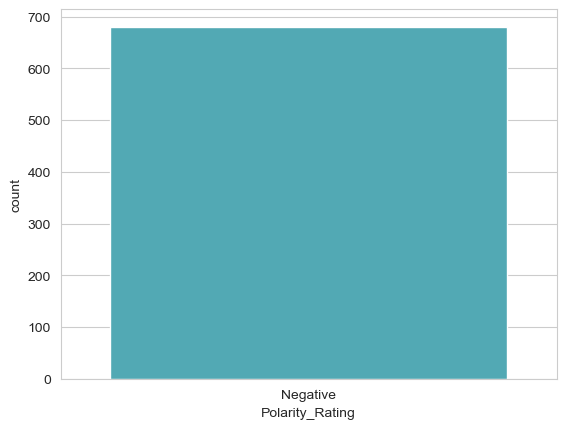

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

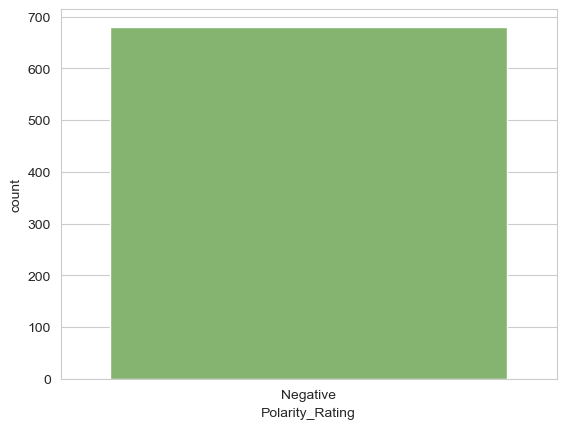

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [28]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:1]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [29]:
df_Neutral_over = df_Neutral.sample(0, replace=True)
df_Negative_over = df_Negative.sample(0, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [30]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [31]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

KeyError: 'Review Text'

**Visualize Text Review with Polarity Rating**

In [26]:
df = df[['review', 'Polarity_Rating']]
df.head()

KeyError: "['review'] not in index"

**Apply One hot encoding on negative, neutral, and positive**

In [32]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment


**Apply Train Test Split**

In [34]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

KeyError: 'review'

**Apply vectorization**

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [35]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

NameError: name 'TfidfTransformer' is not defined

**Add different layers**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
**Fit the Model**

In [36]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

NameError: name 'model' is not defined

**Evaluation of Model**

In [38]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

NameError: name 'model' is not defined

In [39]:
**Prediction**

SyntaxError: invalid syntax (2495207704.py, line 1)

In [ ]:
preds = model.predict(X_test)
preds

In [37]:
preds.shape

NameError: name 'preds' is not defined

In [12]:
df['Polarity_Rating'] = df['sentiment'].apply(lambda x: 'Positive' if x == 1 else('Neutral' if x == 0  else 'Negative'))

KeyError: 'sentiment'

In [10]:
print(df['Seat Belt'].head())

0              Car drivers: seat belt in use
1          Car drivers: seat belt not in use
2       Car drivers: seat belt usage unknown
3    Car drivers: seat belt usage not stated
4                            All car drivers
Name: Seat Belt, dtype: object


In [11]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,SeatBelt_Sentiment
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,Positive
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,Positive
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,Neutral


In [12]:
# Group the DataFrame by sentiment and count the occurrences of each sentiment
sentiment_counts = df['SeatBelt_Sentiment'].value_counts()



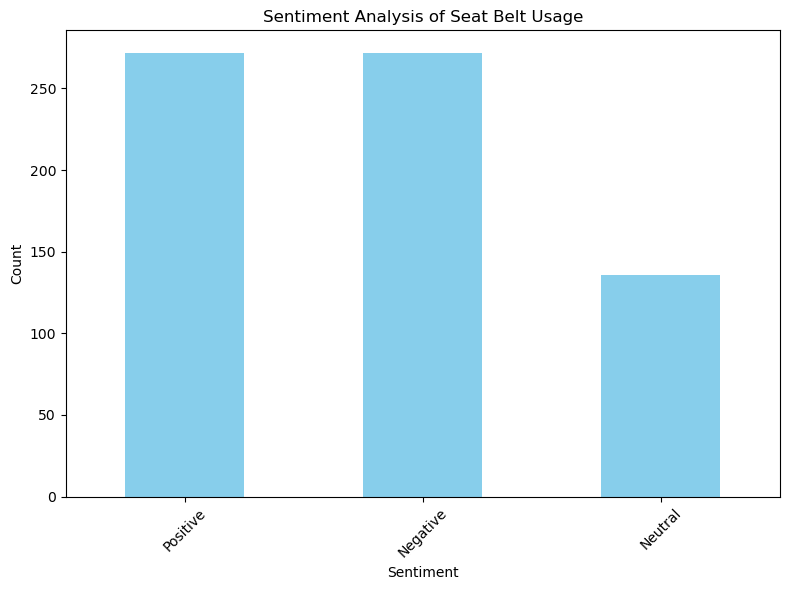

In [13]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis of Seat Belt Usage')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
df['Sentiment'] = df['SeatBelt_Sentiment']

KeyError: 'SeatBelt_Sentiment'

In [12]:
print(df['SeatBelt_Sentiment'])

KeyError: 'SeatBelt_Sentiment'

In [ ]:
df.dropna()

In [ ]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text or "All car drivers" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
(df.head())

In [47]:
print(" \U0001F60A\U0001F44B\U0023\UFE0F\U20E3")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 21-26: truncated \UXXXXXXXX escape (3003523916.py, line 1)

In [ ]:
https://fonts.gstatic.com/s/e/notoemoji/15.0/1f1e6_1f1fa/32.png

In [49]:
print("keycap: #")


keycap: #


In [56]:
print("Hello! \U1686")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 7-12: truncated \UXXXXXXXX escape (242461375.py, line 1)

In [51]:
New Zealand Flag: 🇳🇿 (Regional Indicator Symbol 'N' + Regional Indicator Symbol 'Z')

SyntaxError: invalid character '🇳' (U+1F1F3) (192471742.py, line 1)

In [ ]:
Ireland Flag: 🇮🇪 (Regional Indicator Symbol 'I' + Regional Indicator Symbol 'E')

In [9]:
df.describe()

,Year,VALUE
count,680.000000,595.000000
mean,2013.000000,880.877311
std,4.902586,1424.144822
min,2005.000000,0.000000
25%,2009.000000,18.000000
50%,2013.000000,145.000000
75%,2017.000000,1194.000000
max,2021.000000,7837.000000


In [ ]:
# create a sample DataFrame
df = pd.DataFrame({'categorical_variable': ['Statistic Label', 'Year', 'Seat Belt Usage', 'VALUE']})

In [ ]:
value_counts = df['categorical_variable'].value_counts()

In [ ]:
print(value_counts)

In [8]:
# summary of the dataset: 608 rows, 8 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           680 non-null    object 
 1   Statistic Label     680 non-null    object 
 2   Year                680 non-null    int64  
 3   Seat Belt           680 non-null    object 
 4   UNIT                680 non-null    object 
 5   VALUE               595 non-null    float64
 6   SeatBelt_Sentiment  680 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 37.3+ KB
None


In [ ]:
#Prints the minimum value of all the elements in a
a = np.array([df])
print(a.min())
print(a.max())
print(a.sum())

In [ ]:
# Mean
numeric_data = df["Year"]
if numeric_data.dtype == 'int64' or numeric_data.dtype == 'float64':
    mean = numeric_data.mean()
    mean_rounded = round(mean, 2)
    print('Mean:', mean_rounded)
else:
    print("The selected column does not contain numeric data")
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column


df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()    
 
    
    
    median = home["National"].median()
print('Median:', median)

In [ ]:
median = home["National"].median()
print('Median:', median)

In [ ]:
def analyze_sentiment(kms_driven, owner_type):
    # Perform sentiment analysis based on your criteria
    # This can be a simple rule-based approach, machine learning model, or any other method
    # For simplicity, let's assume a rule-based approach here
    sentiment_score = 0
    if kms_driven < 50000:
        sentiment_score += 1
    elif 50000 <= kms_driven < 100000:
        sentiment_score += 0.5
    if owner_type == "First":
        sentiment_score += 1
    elif owner_type == "Second":
        sentiment_score += 0.5
    # You can add more conditions or use a more sophisticated approach based on your requirements
    return sentiment_score

In [ ]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

In [ ]:
# Flags Unicode sequences
#new_zealand_flag = "\U0001F1F3\U0001F1FF"  # 🇳🇿
#ireland_flag = "\U0001F1EE\U0001F1EA"  # 🇮🇪

# Print the flags
#print("Flag of New Zealand:", new_zealand_flag)
#print("Flag of Ireland:", ireland_flag)